## Variable aleatoria Poisson

Es una distribución de probabilidad discreta que sirve para calcular la probabilidad de que ocurra un determinado número de eventos raros durante un intervalo dado (puede ser tiempo, lingitud, área, etc).

Esta v.a. tomavalores sobre el conjunto $\{0,1,2,...\}$ y tiene un parámetro $\lambda>0$, el cual representa el número de veces que se **espera** que ocurra un evento durante un intervalo dado.

Su función de densidad, está dado como sigue:
$$ f_X(x) = \mathbb{P}(X=x) = \begin{cases} e^{-\lambda}\frac{\lambda^x}{x!}, \quad \text{si } x\in \{0,1,...\} \\
0, \quad \text{e.o.c} \end{cases}$$

Notemos que $\mathbb{E}[X]=\lambda$ y que $\text{Var}(X)=\lambda$. 

**Ejemplo** Supongamos que el número de accidentes que ocurre en un punto en un día tiene distribución Poisson con parámetro $\lambda=2$, 

- ¿cuál es la probabilidad de que en un día ocurran más de dos accidentes?
  $$ \begin{align*} \mathbb{P}(X>2) &= 1- \mathbb{P}(X\le 2) \\
    &= 1- [\mathbb{P}(X=0) + \mathbb{P}(X=1) + \mathbb{P}(X=2)] \\
    &= 1- \left[ e^{-2}\frac{2^0}{0!} + e^{-2}\frac{2^1}{1!} + e^{-2}\frac{2^2}{2!} \right] \\
    &= 1 - e^{-2}[1+2+2] = 1-5e^{-2} = 0.3233
    \end{align*} $$
- ¿cuál es la probabilidad de que ocurran más de dos accidentes sabiendo que por lo menos ocurre uno?
  $$ \begin{align*} \mathbb{P}(X>2 \mid X \ge 1) &= \frac{\mathbb{P}(\{X>2\} \cap \{X \ge 1\} )}{\mathbb{P}\{X \ge 1)\}} \\
       &= \frac{\mathbb{P}(\{X>2\})}{\mathbb{P}\{X \ge 1)\}} \\
       & = \frac{.3233}{1-\mathbb{P}(X<1)} = \frac{0.3233}{1-e^{-2}} \frac{0.3233}{.8646} = 0.3739
       \end{align*} $$
Las probabilidades se encuentran en la ruta ...\Practicas\20240315_va_poisson.ipynb

### Aproximación de Poisson a la Binomial
La distribución de Poisson es una forma límite de la distribución binomial, es decir, es una buena aproximación cuando $n$ es suficientemente grande y $p$ suficientemente pequeña.

$\textbf{Teorema (Poisson).-}$ Sean $S_{n}\sim Bin(n,p_{n})$ bajo el regimen $$\lim_{n\to \infty}np_{n}=\lambda>0.$$
Consideremos la siguiente sucesión de números reales:
$$a_{j}(n,p_n)=\begin{cases}\binom{n}{j}(p_n)^{j}(1-p_{n})^{n-j} & j\leq n\\
0 & j\geq n+1\end{cases}$$

 Entonces,
 $$\lim_{n\to \infty}a_{j}(n,p_n)=a_{j}=e^{-\lambda}\frac{\lambda^{j}}{j!} \ \ \forall j\in \mathbb{N}.$$

 El teorema anterior implica que la distribución de Poisson ofrece un modelo probabilístico adecuado para todos aquellos experimentos aleatorios 	en los que las repeticiones son independientes unas de otras y en los 	que sólo hay dos posibles resultados: éxito o fracaso, con probabilidad de 	éxito pequeña, y en los que el interés se centra en conocer el número de éxitos obtenidos al realizar el experimento un número suficientemente grande de veces.

Empíricamente se ha establecido, que la aproximación se puede aplicar con seguridad si $n\ge100$, $p\le 0.01$ y $np \le20$.

**Ejemplo** Supongamos que la probabilidad de que un producto producido por cierta máquina es defectuoso es de $0.1$. ¿Cuál es la probabilidad de que un lote de 10 productos contenga a lo más un producto defectuoso?

Sea $X$ el número de productos defectuosos, y sabemos que $X$ tiene una distribución binomial con parámetros $n=10$ y $p=0.1$, entonces
\begin{align*}
\mathbb{P}(X\le 1) &= \mathbb{P}(X=0)+\mathbb{P}(X=1) \\ &= \binom{10}{0}(0.1)^{0}(0.9)^{10-0}+\binom{10}{1}(0.1)^{1}(0.9)^{10-1} \\ &= 0.7361
	\end{align*}

Ahora, con la distribución Poisson, tenemos que $\lambda=10(0.1)=1$, por lo que
$$\mathbb{P}(X\le 1) = \mathbb{P}(X=0)+\mathbb{P}(X=1) = \frac{e^{-1}1^{0}}{0!}+\frac{e^{-1}1^{1}}{1!} = e^{-1}+e^{-1} =0.7358$$

### Gráfica de la aproximación de la binomial a la Poisson

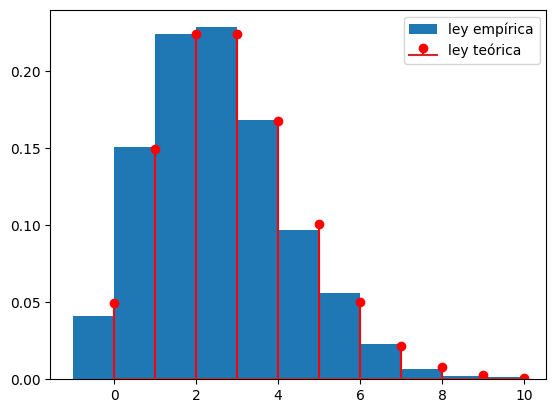

In [3]:
# Simulación de la aproximación de la Bonomial a la Poisson
import numpy as np
import numpy.random as npr
import scipy.stats as sps
from scipy.stats import randint
import matplotlib.pyplot as plt #Librería para la visualización de datos
import random

param=3 # Parametro de la Poisson que queremos aproximar
n=1000 # Este es el número de ensayos en la distribución binomial
N=5000 # Este es el número de simulaciones que realizaremos.

# Genera una muestra de N valores aleatorios de una distribución binomial con parámetros:
# n = 1000 (número de ensayos), p = param/n = 3/1000
X=npr.binomial(n,param/n,N)

# Calcular la frecuencia relativa de los valores simulados
counts = np.bincount(X) / float(N)

# Crear un array de valores posibles
x = np.arange(len(counts))

# Calcular la función de masa de probabilidad (FMP) de la distribución Poisson teórica
f_x = sps.poisson.pmf(x, param)

plt.close()
plt.bar(x - 0.5, counts, width=1., label="ley empírica")
p2 = plt.stem(x, f_x, "r", label="ley teórica")
plt.legend()
plt.show()